In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [2]:
# make test data
n = 50
Xtest = np.linspace(-5,5,n).reshape(-1,1)

In [3]:
# kernel function
def rbf(a, b, param):
    sq_dist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*a.dot(b.T)
    return np.exp(-0.5 * (1.0/param) * sq_dist)

In [4]:
param = 0.1
K_star_star = rbf(Xtest, Xtest, param)
B = np.linalg.cholesky(K_star_star + 1e-12*np.eye(n)) # some noise

In [5]:
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(B, np.random.normal(size=(n,3)))

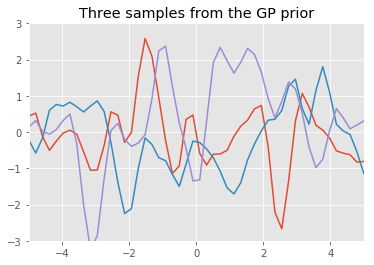

In [6]:
plt.plot(Xtest, f_prior)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()

In [7]:
# hidden data generating function = sin
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

In [8]:
K = rbf(Xtrain, Xtrain, param)
B = np.linalg.cholesky(K + 1e-12*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_star = rbf(Xtrain, Xtest, param)
Bk = np.linalg.solve(B, K_star)
mu = np.dot(Bk.T, np.linalg.solve(B, ytrain)).reshape((n,))

In [9]:
# Compute the standard deviation so we can plot it
s2 = np.diag(K_star_star) - np.sum(Bk**2, axis=0)
stdv = np.sqrt(s2)

In [10]:
# Draw samples from the posterior at our test points.
L_t = np.linalg.cholesky(K_star_star + 1e-6*np.eye(n) - np.dot(Bk.T, Bk))
f_post = mu.reshape(-1,1) + np.dot(L_t, np.random.normal(size=(n,3)))

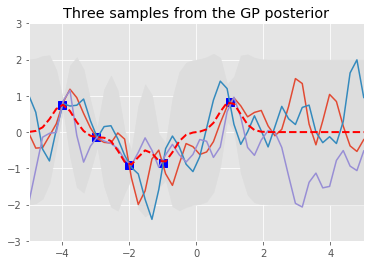

In [11]:
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()